# Install and Import

In [1]:
!pip install databento

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.7 MB/s eta 0:00:00


In [30]:
import databento as db
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import STL


# Sample Data Load

In [9]:
# Specify the path to your local .dbn file
dbn_file_path = '/content/drive/MyDrive/gwu_data'

# Read the DBN file from local storage
dbn_data = db.DBNStore.from_file('/content/drive/MyDrive/gwu_data/xnas-itch-20210201-20210228.ohlcv-1h.dbn.zst')

# Convert the DBN data to a CSV file
csv_file_path = "output_dat21.csv"
dbn_data.to_csv(csv_file_path)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import pandas as pd

df = pd.read_csv('output_dat2.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
0,2018-05-01T08:00:00.000000000Z,34,2,8165,41.64,41.77,41.64,41.75,3000,VXX
1,2018-05-01T08:00:00.000000000Z,34,2,4812,178.45,178.45,178.45,178.45,500,MA
2,2018-05-01T08:00:00.000000000Z,34,2,2687,171.50,171.50,171.50,171.50,2,FB
3,2018-05-01T08:00:00.000000000Z,34,2,7775,30.46,30.46,30.33,30.33,532,UCO
4,2018-05-01T08:00:00.000000000Z,34,2,7736,11.50,11.50,11.50,11.50,300,TZA


# Convert All File Types to CSV

In [13]:
import os
import pandas as pd
import databento as db


directory_path = '/content/drive/MyDrive/gwu_data/'


counter = 1


for filename in os.listdir(directory_path):
    if filename.endswith('.dbn.zst'):
        dbn_file_path = os.path.join(directory_path, filename)
        dbn_data = db.DBNStore.from_file(dbn_file_path)
        output_file = os.path.join(directory_path, f'data_{counter}.csv')
        dbn_data.to_csv(output_file)
        counter += 1

print("All .dbn files have been converted and exported.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


All .dbn files have been converted and exported.


# Dask to load in entire 6+ gb dataframe

In [6]:
import os
import dask.dataframe as dd

directory_path = '/content/drive/MyDrive/gwu_data/'

csv_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.startswith('data_') and f.endswith('.csv')]




In [7]:
#creation of 1 big file
df = dd.read_csv(csv_files)
df.to_csv(os.path.join(directory_path, 'combined_data_dask.csv'), single_file=True)

print("All CSV files have been combined and saved using Dask.")

All CSV files have been combined and saved using Dask.


# Sample df EDA, stats, simple feature engineering

In [38]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/gwu_data/data_1.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
0,2018-09-04T08:00:00.000000000Z,34,2,4084,20.90,20.90,20.90,20.90,1145,INFY
1,2018-09-04T08:00:00.000000000Z,34,2,976,42.76,42.81,42.74,42.74,5800,BP
2,2018-09-04T08:00:00.000000000Z,34,2,3909,5.74,5.85,5.74,5.85,150,ICL
3,2018-09-04T08:00:00.000000000Z,34,2,4993,17.28,17.31,17.22,17.24,1300,MFGP
4,2018-09-04T08:00:00.000000000Z,34,2,2933,30.75,30.75,30.75,30.75,200,FLRN


In [12]:
df_sorted

,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
678354,2018-09-25T17:00:00.000000000Z,34,2,1,70.54,70.54,70.29,70.38,36402,A
184031,2018-09-10T14:00:00.000000000Z,34,2,1,68.20,68.40,68.13,68.35,40901,A
358830,2018-09-14T15:00:00.000000000Z,34,2,1,69.05,69.10,68.89,68.97,24669,A
749031,2018-09-27T14:00:00.000000000Z,34,2,1,70.25,70.47,70.11,70.32,31376,A
205632,2018-09-10T18:00:00.000000000Z,34,2,1,68.23,68.26,68.07,68.09,24767,A
...,...,...,...,...,...,...,...,...,...,...
62872,2018-09-05T16:00:00.000000000Z,34,2,8656,7.76,7.76,7.69,7.75,4297,ZYNE
127247,2018-09-06T20:00:00.000000000Z,34,2,8660,7.36,7.36,7.36,7.36,5135,ZYNE
326183,2018-09-13T16:00:00.000000000Z,34,2,8673,6.94,6.97,6.92,6.93,2289,ZYNE
424812,2018-09-17T19:00:00.000000000Z,34,2,8672,6.76,6.77,6.59,6.65,17319,ZYNE


In [15]:
symbol_counts = df['symbol'].value_counts(ascending=False)

In [16]:
symbol_counts[0:10]

,count
symbol,
FB,304
SPY,304
AAPL,304
AMZN,304
TVIX,303
AMD,303
TSLA,303
JD,303
BABA,303


In [19]:
# Convert the 'ts_event' column to datetime
df['ts_event'] = pd.to_datetime(df['ts_event'])

# Now you should be able to format the column
df['year_month_day_hour'] = df['ts_event'].dt.strftime('%Y-%m-%d %H')

In [20]:
df

,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,year_month_day_hour
0,2018-09-04 08:00:00+00:00,34,2,4084,20.9000,20.9000,20.9000,20.9000,1145,INFY,2018-09-04 08
1,2018-09-04 08:00:00+00:00,34,2,976,42.7600,42.8100,42.7400,42.7400,5800,BP,2018-09-04 08
2,2018-09-04 08:00:00+00:00,34,2,3909,5.7400,5.8500,5.7400,5.8500,150,ICL,2018-09-04 08
3,2018-09-04 08:00:00+00:00,34,2,4993,17.2800,17.3100,17.2200,17.2400,1300,MFGP,2018-09-04 08
4,2018-09-04 08:00:00+00:00,34,2,2933,30.7500,30.7500,30.7500,30.7500,200,FLRN,2018-09-04 08
...,...,...,...,...,...,...,...,...,...,...,...
830676,2018-09-28 23:00:00+00:00,34,2,5512,10.2100,10.2100,10.2100,10.2100,171,NLY,2018-09-28 23
830677,2018-09-28 23:00:00+00:00,34,2,4316,118.9400,118.9400,118.9400,118.9400,11,JBHT,2018-09-28 23
830678,2018-09-28 23:00:00+00:00,34,2,6741,19.8900,19.8900,19.8900,19.8900,251,RST,2018-09-28 23
830679,2018-09-28 23:00:00+00:00,34,2,864,23.0000,23.0000,23.0000,23.0000,200,BITA,2018-09-28 23


In [23]:
df_sorted = df.sort_values(by=['symbol','year_month_day_hour'], ascending=True)

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [28]:
symbol_group = df.groupby('symbol')


def compute_summary_statistics(group):
    summary_stats = {
        'Mean': group['close'].mean(),
        'Median': group['close'].median(),
        'Standard Deviation': group['close'].std(),
        'Variance': group['close'].var(),
        'Minimum': group['close'].min(),
        'Maximum': group['close'].max(),
        'Q1': group['close'].quantile(0.25),
        'Q3': group['close'].quantile(0.75),
        'Skewness': skew(group['close']),
        'Kurtosis': kurtosis(group['close'])
    }
    return summary_stats


summary_statistics_per_stock = symbol_group.apply(compute_summary_statistics)
summary_statistics_df = pd.DataFrame(summary_statistics_per_stock.tolist(), index=summary_statistics_per_stock.index)


print("Summary Statistics per Stock:")
print(summary_statistics_df)


<ipython-input-28-2704fdb85f0b>:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'Skewness': skew(group['close']),
<ipython-input-28-2704fdb85f0b>:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'Kurtosis': kurtosis(group['close'])
<ipython-input-28-2704fdb85f0b>:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'Skewness': skew(group['close']),
<ipython-input-28-2704fdb85f0b>:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'Kurtosis': kurtosis(group['close'])
<ipython-input-28-2704

Summary Statistics per Stock:
             Mean  Median  Standard Deviation    Variance  Minimum  Maximum  \
symbol                                                                        
A       69.041119  69.100            1.362613    1.856715  66.9200   71.170   
AA      41.999114  42.040            1.107487    1.226527  39.8300   44.040   
AAAU    11.969773  11.975            0.106890    0.011426  11.3300   12.050   
AABA    66.714591  67.320            1.592827    2.537097  63.1800   69.250   
AAC      7.476718   7.340            0.396787    0.157440   6.7400    8.720   
...           ...     ...                 ...         ...      ...      ...   
ZVZZT   10.021525  10.020            0.086827    0.007539   9.9100   11.370   
ZWZZT   10.250000  10.000            2.073672    4.300117   5.1300   15.000   
ZXZZT    8.930144   1.000           15.034722  226.042864   0.6399   59.400   
ZYME    14.942970  14.610            0.953216    0.908621  13.4400   16.675   
ZYNE     7.634802   7.

# Sample Stock Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-4d4ec02d788e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['MA_30'] = symbol_df['close'].rolling(window=30).mean()
<ipython-input-32-4d4ec02d788e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

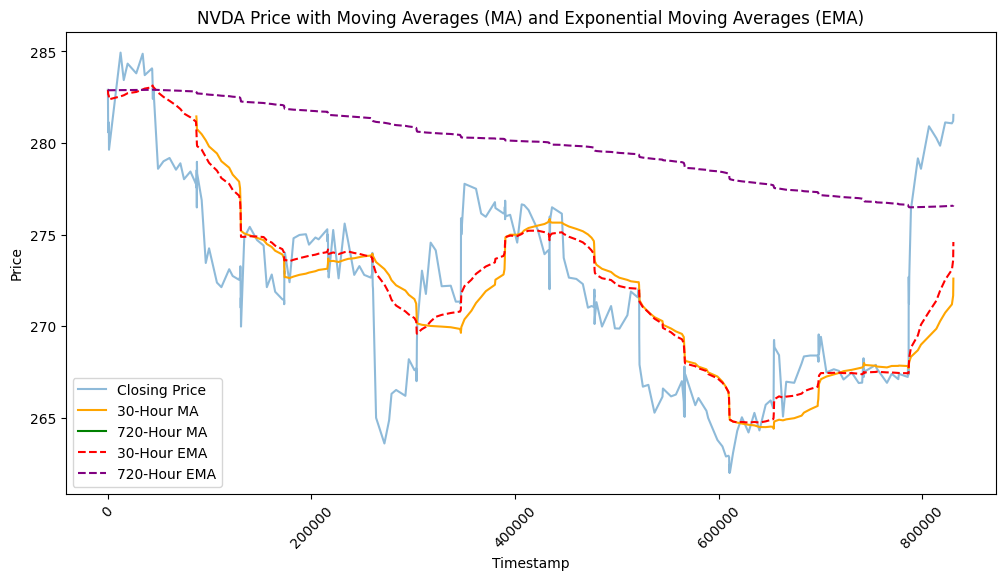

In [32]:
# Select a specific symbol (e.g., 'A') for analysis
symbol = 'NVDA'
symbol_df = df[df['symbol'] == symbol]

# Step 1: Moving Average (MA)
# 30-hour moving average (daily approximation) and 720-hour moving average (monthly approximation)
symbol_df['MA_30'] = symbol_df['close'].rolling(window=30).mean()
symbol_df['MA_720'] = symbol_df['close'].rolling(window=720).mean()

# Step 2: Exponential Moving Average (EMA)
# 30-hour EMA and 720-hour EMA
symbol_df['EMA_30'] = symbol_df['close'].ewm(span=30, adjust=False).mean()
symbol_df['EMA_720'] = symbol_df['close'].ewm(span=720, adjust=False).mean()

# Step 3: Plotting the Moving Averages and Exponential Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(symbol_df.index, symbol_df['close'], label='Closing Price', alpha=0.5)
plt.plot(symbol_df.index, symbol_df['MA_30'], label='30-Hour MA', color='orange')
plt.plot(symbol_df.index, symbol_df['MA_720'], label='720-Hour MA', color='green')
plt.plot(symbol_df.index, symbol_df['EMA_30'], label='30-Hour EMA', linestyle='--', color='red')
plt.plot(symbol_df.index, symbol_df['EMA_720'], label='720-Hour EMA', linestyle='--', color='purple')
plt.title(f'{symbol} Price with Moving Averages (MA) and Exponential Moving Averages (EMA)')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Simple feature engineering

In [46]:
df = pd.read_csv('/content/drive/MyDrive/gwu_data/data_1.csv')
df.head()

import pandas as pd
import numpy as np

# Assume df is already defined and loaded with appropriate data

# Convert 'ts_event' column to datetime and set it as the index
df['ts_event'] = pd.to_datetime(df['ts_event'])
df.set_index('ts_event', inplace=True)

# List of subset tickers
df_subset_tickers = ['FB', 'SPY', 'AAPL', 'AMZN', 'TVIX', 'AMD', 'TSLA', 'NVDA', 'BABA', 'TQQQ']

# Subset the DataFrame based on the 'symbol' column
df_subset = df[df['symbol'].isin(df_subset_tickers)].copy()

# Initialize new columns in df_subset
df_subset['MA_30'] = np.nan
df_subset['MA_60'] = np.nan
df_subset['EMA_30'] = np.nan
df_subset['EMA_60'] = np.nan

# Loop over each unique symbol in the subset and calculate moving averages and EMAs
for symbol in df_subset['symbol'].unique():
    symbol_df = df_subset[df_subset['symbol'] == symbol].copy()

    # Calculate Moving Averages (MA)
    symbol_df['MA_30'] = symbol_df['close'].rolling(window=30).mean()
    symbol_df['MA_60'] = symbol_df['close'].rolling(window=60).mean()

    # Calculate Exponential Moving Averages (EMA)
    symbol_df['EMA_30'] = symbol_df['close'].ewm(span=30, adjust=False).mean()
    symbol_df['EMA_60'] = symbol_df['close'].ewm(span=60, adjust=False).mean()

    # Direct assignment back to the df_subset DataFrame without using .loc
    df_subset.update(symbol_df[['MA_30', 'MA_60', 'EMA_30', 'EMA_60']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
symbol = 'NVDA'
symbol_df = df_subset[df_subset['symbol'] == symbol]
symbol_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,MA_30,MA_60,EMA_30,EMA_60
ts_event,,,,,,,,,,,,,
2018-09-04 08:00:00+00:00,34,2,5619,282.00,282.90,282.00,282.90,340,NVDA,NaN,NaN,282.900000,282.900000
2018-09-04 09:00:00+00:00,34,2,5619,282.51,282.53,282.21,282.26,466,NVDA,NaN,NaN,282.858710,282.898225
2018-09-04 10:00:00+00:00,34,2,5619,282.26,282.91,282.00,282.15,2767,NVDA,NaN,NaN,282.812986,282.896149
2018-09-04 11:00:00+00:00,34,2,5619,281.75,281.75,280.10,280.58,4190,NVDA,NaN,NaN,282.668923,282.889724
2018-09-04 12:00:00+00:00,34,2,5619,281.10,281.61,280.91,281.12,3075,NVDA,NaN,NaN,282.568992,282.884815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-28 19:00:00+00:00,34,2,5650,279.86,281.50,279.31,281.12,644060,NVDA,270.738667,269.142167,272.533165,276.546871
2018-09-28 20:00:00+00:00,34,2,5650,281.12,281.25,280.99,281.07,652351,NVDA,271.192000,269.405500,273.083929,276.559418
2018-09-28 21:00:00+00:00,34,2,5650,281.11,281.20,281.03,281.20,578,NVDA,271.668667,269.687000,273.607546,276.572290
